Exécuter `conda install python-graphviz` dans le terminal. Je ne sais pas pourquoi mais ça ça marche. Il faut peut-être faire `!pip install graphviz` après.

In [1]:
!pip install lightgbm

In [2]:
from sklearn.datasets import make_regression
import pandas as pd
import polars as pl
import string
import lightgbm
import graphviz 

In [3]:
X, y = make_regression(n_samples=10000, n_features=4, n_informative = 4, random_state=123)

In [4]:
X = pl.from_numpy(X).with_columns(
    [
        pl.col("column_2").qcut([i / 10 for i in range(10)], labels = list(string.ascii_lowercase)[0:11]).cast(pl.Categorical).alias("column_2")
    ]
).to_pandas()

In [5]:
model = lightgbm.LGBMRegressor(n_estimators=10, max_depth=4, num_leaves=16, force_row_wise=True)
model.fit(X, y)

[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 4
[LightGBM] [Info] Start training from score 1.158386


/opt/conda/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(force_row_wise=True, max_depth=4, n_estimators=10, num_leaves=16)

In [10]:
model.booster_.trees_to_dataframe()

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S2,0-S1,None,column_3,31281900.0,0.009825,<=,left,None,1.158390,0,10000
1,0,2,0-S2,0-S4,0-S5,0-S0,column_2,6846060.0,6||7||8||9||10,==,right,NaN,-4.391180,5039,5039
2,0,3,0-S4,0-S11,0-S10,0-S2,column_3,2958950.0,-0.882659,<=,left,None,-0.647025,2501,2501
3,0,4,0-S11,0-L0,0-L12,0-S4,column_3,590940.0,-1.641014,<=,left,None,-5.012150,960,960
4,0,5,0-L0,None,None,0-S11,None,NaN,None,None,None,None,-9.072415,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,9,5,9-L3,None,None,9-S7,None,NaN,None,None,None,None,1.187251,581,581
306,9,5,9-L8,None,None,9-S7,None,NaN,None,None,None,None,4.384891,1302,1302
307,9,4,9-S11,9-L6,9-L12,9-S5,column_3,185402.0,2.457874,<=,left,None,7.049120,609,609
308,9,5,9-L6,None,None,9-S11,None,NaN,None,None,None,None,6.499361,554,554


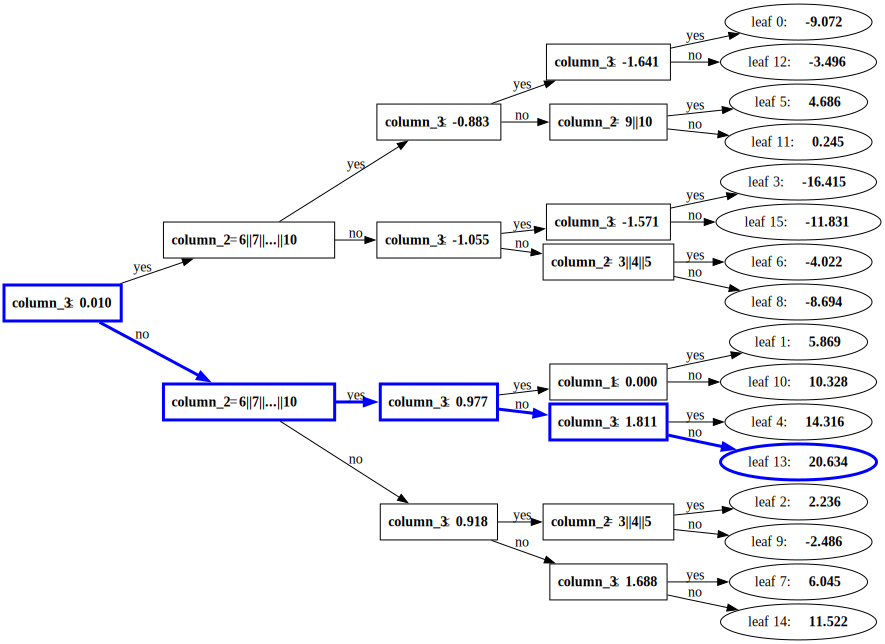

In [7]:
lightgbm.create_tree_digraph(model, 0, max_category_values=3, example_case=X.iloc[12:13, :])